# Modeling Runners' Times in the Cherry Blossom Race  <a name="Top"></a>
<span style="color:black; font-size: 1.3em;"> MSDS7333 Unit8 Case Study

<span style="color:black; font-size: 1.3em;">7/2/2018

<span style="color:black; font-size: 1.3em;"> Mooyoung Lee 

### <span style="color:red">Use hyperlinks to move to a reference and come back.
    
# Table of Contents


1. [Introduction](#introduction)
2. [Background](#Background)
3. [Method](#Method)
4. [Results](#Results)
5. [Conclusion](#Conclusion)
6. [Reference Code](#code)


# Introduction <a name="introduction"></a>

<span style="color:black; font-size: 1.3em;">This study is a part of the excercises from the book, Data Science in R by Deborah Nolan.  Data downloading and filtering techniques for men's race results is posted on the website that is associated with the book. <http://rdatasciencecases.org/CherryBlossom/code.R>

<span style="color:black; font-size: 1.3em;">In this study, question #7 from the chapter 2 of the book will be solved.  The requirements of the question #7 is creating a data frame for the analysis of female runners' results. First, the code provided to download and clean for the men's result will be edited to repeat with wemen's results for the period between 1999 to 2012. Scraping web data requires extra menual works than using APIs so special attention will be paid to each web page in order to download and transform into a usable format. 

<span style="color:black; font-size: 1.3em;">The target specification of the women's data frame will be same as followings:
- Features include [year, sex, name, home, age, runTime, cleanName]
- 'runTime' should be a net time in minutes which is the time difference when a runner passes a start line and a finish line. 
- The data type of 'age' and 'runTime' will be numeric not string.
- 'cleanName' use lower case letters only and drops all non-alphabet symbols. 


<span style="color:black; font-size: 1.3em;">Once the men and women race results are available for furthur analysis, few thing will be checked for curiosity.  
- race time comparison between men and women
- race age comparison between men and women
- Abnormal results from people who attended race multiple times
- Race results with minors...

[Back to top](#Top)

# Background <a name="Background"></a>


## <span style="color:blue">Data:

<span style="color:black; font-size: 1.3em;">Cherry Blssom hold a ten mile run and a 5K run-walk events in Washington, D.C in April every year.  These type of short races give very less burden to normal people to join, and they get benefit by signing up for these events from pushing them to be in a good shape for the race.   The Cheery Blossom started in 1973 for professional runners to prepare the Boston Marathon [Nolan p.45].  Cherry Blossom started in 1973 with [129 finishers](https://www.washingtonpost.com/archive/sports/1982/04/03/rodgers-runs-for-fifth-blossom/38c9db2f-5906-4462-adbd-162b2a712939/?noredirect=on&utm_term=.0fca6135a4a3), and now in 2018, [16,658 runners finished the ten-mile run, and 2,530 runners finished the 5k run](http://www.cherryblossom.org/aboutus/results.php).  

<span style="color:black; font-size: 1.3em;">Only the [ten-mile race results](http://www.cherryblossom.org/aboutus/results_list.php) are collected for this study.  The race year between 1999 and 2012 are used only since the result format shown on the website is drastically changed after 2013.  The raw data from the website normally contains following features, 

<span style="color:black; font-size: 1.3em;"> - **Place**: This is an overall rank from a sex division

<span style="color:black; font-size: 1.3em;">- **Div/Tot**: This shows the age division rank with total division numbers.  There is a one age division for the age 1-19, and the age division divided every 5 years upto 80. And the last age division is the age 80-99.

<span style="color:black; font-size: 1.3em;">- **Num**: This is a runners' plate and bib number.   - Name: This is a name of a runner.

<span style="color:black; font-size: 1.3em;">- **Ag**: This is an age of a runner.

<span style="color:black; font-size: 1.3em;">- **Hometown**: This shows a city and a state name of the runner.  For foreign runners it only shows a country name.

<span style="color:black; font-size: 1.3em;">- **5 Mile**: 5-mile passing time.

<span style="color:black; font-size: 1.3em;">- **Time**: 10-mile finish time.

<span style="color:black; font-size: 1.3em;">- **Pace**: This shows a minute per mile value.  Sometime, there are two pace values for each 5 and 10 mile results. 

## <span style="color:blue">Web scraping:

<span style="color:black; font-size: 1.3em;">Many websites are not providing APIs to download their data or they charge to download their data.  In that case, web-scraping is a viable option to have access to the data for analysis.   This study handles table data shown on the Cherry Blossom website so this study will show a way to handle a table data shown on a website.  For your information, web-scrapping is legal unless you are not damaging the website server since the data is opened to download. 

[Back to top](#Top)

# Method <a name="Method"></a>

## <span style="color:blue">Data download:

<span style="color:black; font-size: 1.3em;">**'extractResTable'** function is re-used to download women's race results and saved as text file for each year. 


## <span style="color:blue">Data reading:
<span style="color:black; font-size: 1.3em;">[**'extractVariablesWomen'**](#Extract) function is created by editing the 'extractVariables' function shown on the textbook.  The header and the body of the result tables are separated by a line with equal symbols, e.g. '=== ====== ======'.  The number of equal sign are normally equal to the character size of each feature values.  Thus, the locations of the space allow to slice the data for each feature.   

<span style="color:black; font-size: 1.3em;">Some exeptions were found for **2001 year data**. The equal symbols that allows to separate the header and the body were missing completely.  Thus, the character counting to slice the body data is done using one of the race recording data.  The 10th recording from the bottom of the result is used since the assigned characters for each features are mostly filled with large place and time values. Also, the 10th recording from the last line is used to avoid to grab empty lines or footnotes. The spacing between recording characters are also used to find the right number of characters for each field.  Some spaces between name and address is droped by checking the last 10th record manually.  This process is wrapped into a new function, [**'findColLocs2'**.](#FindCol2)

<span style="color:black; font-size: 1.3em;">Other issues with **2001 year data** are the column names are missing and the body recordings cannot be separated from heading because the equal symbols are missing.  The **column names** from the previous year, 2000, is copied and used to make a column names. However, the **gun time and net time is switched from previous year** so the column names are switched also.  And the person name, Elana, from the first place is used to know the starting pont of the body recordings.  These exceptional cases are handled from the [**'extractVariablesWomen'**](#Extract) function.  

<span style="color:black; font-size: 1.3em;">Footnoets and the blank rows are removed from the [**'extractVariablesWomen'**](#Extract) function while it is extracting features, ["name", "home", "ag", "gun", "net", "time"].

<span style="color:black; font-size: 1.3em;">The issue with 2006 men's data is repeated with women's data in 2006.  One space was missing in the equal symbol line so that it was not allowing to find a seperation location between 'Hometown' and 'Gun Tim' features.  The code to fix this issue for men is re-used for women's recording.

<span style="color:black; font-size: 1.3em;">[**'createDF'**](#createDF) function is used to make a list of recordings from all years.  One important change is made in selecting time feature to represent individual's time record for 10-mile run.  Originally, the code from the textbook choose the first non-NA values in the order of [net, gun, time].  **The order is changed to [net, time, gun].**  Gun time is the time shown on the top of the start and finish lines when someone is passing by.  The 'gun' time is not an actual runnig time.  The actual running time for each individual is the 'net' time is the difference between the 'gun' time when someone is passing the start and finish lines.  If the result on a web showing only 'time' column then the 'time' should be a 'net' time.  If someone pass a start line because of the tens of thousand people in front of the runner, the runner's 'gun' tiem will be higher by 10 to 20 minutes than 'net' time.    There was no case where the 'time' and 'gun' features are existing both from the result tables but to make sure the order between 'gun' and 'time' switched.  'Gun' time need to be the last feature that represent someone's actual running time. 


## <span style="color:blue">Data filtering:

<span style="color:black; font-size: 1.3em;">From the [**'createDF'**](#createDF) function, the record time values are cleaned by removing blank spaces and # and * symbols.  The # and * symbols means that they followed USA Track & Field(USATF) guidelines to start.  

<span style="color:black; font-size: 1.3em;">The record time values are converted into numeric minute values with decimals from the original 'hour:minute:second' format with [**'convertTime'**](#convertTime) function.  Age data type is also changed from string to numeric.  These data type conversion was done inside of 'createDF' function.  Also, the 'year' and 'sex' alues are added while creating a data list.  

<span style="color:black; font-size: 1.3em;">The data list created by the 'createDF' function is appeded into a one big table, 'cbWomen', using 'rbind' function. 

<span style="color:black; font-size: 1.3em;">Using the modified [**'trimBlanks'**](#trimBanks) function, the name values are cleaned to remove spaces before and after the name. Also, spaces between words are reduced to 1 space, and the comma and dots are removed.  Finally, names are returned with lower case letters only. 


## <span style="color:blue">Data exploration:

<span style="color:black; font-size: 1.3em;">**[Outliers](#outlier) are found from a couple of places.**  First there were recordings with very small run times such as 1.5 minutes for 10-mile run.  It occured only for men's results.  Those small run time recordings are filtered by selecting only time greater than 5-minute, and 5 samples are removed. Also from the men's result there were 19 recordings with missing age values so those are removed as well.  From women's result, 21-recordings with no age values are deleted.  

### - [The density of age by sex groups(Female and Male)](#age) are checked to check the age distribution by sex. 
### - [The 10-mile run time distributions](#time) are also checked to see the difference between women and men.
### - [The total number of race participants](#participants) are counted and checked by year.
### - [The fastest women and men times](#Lowess) are compared.

[Back to top](#Top)

# Results <a name="Results"></a>

<span style="color:blue; font-size: 1.3em;">  The women's results from 1999 and 2012 were able to download successfully by modifying 'extractVariables' and 'createDF' functions.  All women and men data were filetered and appended into a table ('Results') for future analysis.

<span style="color:blue; font-size: 1.3em;">Data is explored to compare the distributsions and time records between women and men.  There were [75,951 women](#length) and [70,046 men](#lengthM) recordings from the year 1999 and 2012.

<span style="color:blue; font-size: 1.3em;">The age distributions in men are more right-skewed than women. The mode of age was late twenties for both sexes. The mean age of women and men were [33.8 and 38.6 years](#age) accordingly.  

<span style="color:blue; font-size: 1.3em;">The [running time distributions](#time) were about normal for both sexes.  In average, men's time was about 10.7 minutes faster then women's.  

<span style="color:blue; font-size: 1.3em;">The rate of [increase in women participants](#participants) was higher than that of men's.  Around year 2005 the number of participants between women and men were same.  After the year 2005, the number of women racers were always higher than men. 

<span style="color:blue; font-size: 1.3em;">[The fastest women and men times are compared.](#Lowess)  ['changepoint'](#change) function is utilized to check the variance change in deffrence of the running times with change in age.  Women's running time change were very unstable before 11-year-old and after 68-year-old.  Men's results was unstable before 15-year-old and after 76-year-old.  Thus, only data between 15 and 68 are compared where shows only gradual running time change over time.  [Locally weighted regression(LOWESS)](#Lowess) models are generated using the fastest women and men records. The mean difference between sexes was estimated using the LOWESS model prediction.  Between the age 20 to 30, men were faster by around 7 minutes. After age of 60 the rate of difference become very large thus women became much slower than men.  

<span style="color:blue; font-size: 1.3em;">[The ratio of women's net time over men's net time is compared.](#TimeRatio)  The ratio was about 1.14 for the age between 20 to 60.  Boston marathon qualification time ratio between women and men were also checked but the ratio was getting smaller as age increase.  


[Back to top](#Top)

# Conclusions/Discussions <a name="Conclusion"></a>

<span style="color:blue; font-size: 1.3em;"> Writing code to scrape data from web pages seemed very labor intensive if the data format changes from page to page.  It is obvious that coping 14 tables manually and paste into Excel sheet is much faster than writing code to scrape data.  However, the main purpose of this study was learning how to scrape data so it was fine.  

<span style="color:blue; font-size: 1.3em;">When we know that those top racers are normally run 20 to 30 miles a week to practice with weight lifting and extream diet plans, the fastest recordings are close to human limits. A good shaped person can run a mile in 7 minutes. **Running 10 miles with 4~5 minutes per mile pace is a world record.**

<span style="color:blue; font-size: 1.3em;">From the data exploration, it is found that the fastest record for both women and men are not coming before the age of 20.  [**The fastest 10-mile running records can only come from the age between 20 to 35 regardless its gender.**](#Lowess)

<span style="color:blue; font-size: 1.3em;">From around age of 13, men become faster than women and the fastest record cannot come from women after the age of 13.  Above statement may not be statistically significant since there were only 16 women racers who were 13-year-old.  However, for the age between 20 and 60, there were thousands of people participated for each age so that **the LOWESS model for the fastest women and men will represent the human limit at the Cherry Blossom course.**  The difficulty levels are all differenct for each long-distance track so these models will not be applied outside of this event.  Also, each event location and date affect the runner's record a lot since the temperature and climate changes so the lowess model found from this event recordings cannot be applied outside of this event.  

<span style="color:blue; font-size: 1.3em;">With the observations above, it is true that the minors and elders do not have the same running/physical abilities than the young adult people. Also, women and men have different physical limits.  This study may be extended to examine the qualifying standards for other marathon events are fair or not.  First, women showed that their finish time grow faster than men's finish time increase as they get older. Second, the actual finish time ratio was about fixed between age 20 to 60 and went up.  On the other hand, the Boston marathon qualification rule simply add 30 minutes for women's qualification time to men's.  [**This makes women become more harder to become qualified than men to Boston marathon as they get older.**](#TimeRatio)

<span style="color:blue; font-size: 1.3em;">**For furthur study, it will interesting to see if how many people are selling their tickets.**  Many running event limits the number of participants due to the safety so only limited number of people can get tickets.  Also, people buy tickets a half-year ahead of race and many people cannot join the event due to injuries and personal issues.  Another reason people have to buy a ticket from someone else is some famous event requires a near impossible qualification records, e.g. [Boston marathon](#http://www.baa.org/Races/Boston-Marathon/Participant-Information/Qualifying.aspx). Boston marathon asks around 3 hour on record from other official marathon running for the younger age groups.  Running a marathon in 3 hour considered a professional runner.  Once a runner addicted to running and marathon events, he/she has to complete all famous marathon events in U.S. and the most famous marathon event that people want to go is the Boston marathon.  Thus, with many reasons people sell and buy tickets.  This will result inconsistency in the results.  Normally, it is not common to see a time variation more than 30 minutes if s/he join a marathon event every year. Especially, for the Boston marathon, it will be easier to catch those who selling the ticket since they should not have a record more than late 3 hours.  

[Back to top](#Top)

# Reference Code  <a name="code"></a>

[Back to top](#Top)

# <span style="color:red">Men Result Data Downloading and Cleaning

## Manula Input data for the Men's Official Results

Website addresses for each year's event results are all different and patterns are mixed.  Thus, individual addresses for each year's record are manually typed. 

In [1]:
library(XML)
# base address
ubase = "http://www.cherryblossom.org/"
menURLs =  c("results/1999/cb99m.html", "results/2000/Cb003m.htm", "results/2001/oof_m.html",
    "results/2002/oofm.htm", "results/2003/CB03-M.HTM",
    "results/2004/men.htm", "results/2005/CB05-M.htm", 
    "results/2006/men.htm", "results/2007/men.htm", 
    "results/2008/men.htm", "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm")

urls = paste(ubase, menURLs, sep = "")

urls

[1] "http://www.cherryblossom.org/results/1999/cb99m.html"       
 [2] "http://www.cherryblossom.org/results/2000/Cb003m.htm"       
 [3] "http://www.cherryblossom.org/results/2001/oof_m.html"       
 [4] "http://www.cherryblossom.org/results/2002/oofm.htm"         
 [5] "http://www.cherryblossom.org/results/2003/CB03-M.HTM"       
 [6] "http://www.cherryblossom.org/results/2004/men.htm"          
 [7] "http://www.cherryblossom.org/results/2005/CB05-M.htm"       
 [8] "http://www.cherryblossom.org/results/2006/men.htm"          
 [9] "http://www.cherryblossom.org/results/2007/men.htm"          
[10] "http://www.cherryblossom.org/results/2008/men.htm"          
[11] "http://www.cherryblossom.org/results/2009/09cucb-M.htm"     
[12] "http://www.cherryblossom.org/results/2010/2010cucb10m-m.htm"
[13] "http://www.cherryblossom.org/results/2011/2011cucb10m-m.htm"
[14] "http://www.cherryblossom.org/results/2012/2012cucb10m-m.htm"

## Function extracting tables from a website

In [2]:
extractResTable =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "http://www.cherryblossom.org/results/2009/09cucb-F.htm",
           year = 1999, sex = "male", file = NULL)
  {
    doc = htmlParse(url)

    if (year == 2000) {
      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    else if (year == 2009 & sex == "male") {
      # Get preformatted text from <div class="Section1"> element
      # Each line of results is in a <pre> element
      div1 = getNodeSet(doc, "//div[@class='Section1']")
      pres = getNodeSet(div1[[1]], "//pre")
      els = sapply(pres, xmlValue)
    }
     else if (year == 1999) {
               # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]]  
     } 
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }



## Download tables

In [3]:
years = 1999:2012
menTables = mapply(extractResTable, url = urls, year = years)
names(menTables) = years
sapply(menTables, length)
# save(menTables, file = "CBMenTextTables.rda")

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3193 3019 3627 3727 3951 4164 4335 5245 5283 5913 6659 6919 7019 7201

## Save Tables as text files

In [4]:
dir.create(file.path(getwd(), "MenTxt"))
write(x=menTables$'2012',file="MenTxt/2012.txt")
write(x=menTables$'2011',file="MenTxt/2011.txt")
write(x=menTables$'2010',file="MenTxt/2010.txt")
write(x=menTables$'2009',file="MenTxt/2009.txt")
write(x=menTables$'2008',file="MenTxt/2008.txt")
write(x=menTables$'2007',file="MenTxt/2007.txt")
write(x=menTables$'2006',file="MenTxt/2006.txt")
write(x=menTables$'2005',file="MenTxt/2005.txt")
write(x=menTables$'2004',file="MenTxt/2004.txt")
write(x=menTables$'2003',file="MenTxt/2003.txt")
write(x=menTables$'2002',file="MenTxt/2002.txt")
write(x=menTables$'2001',file="MenTxt/2001.txt")
write(x=menTables$'2000',file="MenTxt/2000.txt")
write(x=menTables$'1999',file="MenTxt/1999.txt")

Warning message in dir.create(file.path(getwd(), "MenTxt")):
"'C:\Users\ML\Documents\QTWcode\unit8\MenTxt' already exists"

# Read Table Data

In [5]:
# Function to find column locations
findColLocs = function(spacerRow) {
  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)
  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

In [6]:
# Function to select right columns matching desired feature name
selectCols = function(shortColNames, headerRow, searchLocs) {
  sapply(shortColNames, function(shortName, headerRow, searchLocs){
    startPos = regexpr(shortName, headerRow)[[1]]
    if (startPos == -1) return( c(NA, NA) )
    index = sum(startPos >= searchLocs)
    c(searchLocs[index] + 1, searchLocs[index + 1])
  }, headerRow = headerRow, searchLocs = searchLocs )
}

In [7]:
# Function to extract values from text file
extractVariables = 
  function(file, varNames =c("name", "home", "ag", "gun", "net", "time"))
{
       # Find the index of the row with =s
  eqIndex = grep("^===", file)
       # Extract the two key rows and the data
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
      
      # Remove footnotes and blank rows
  footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
  if ( length(footnotes) > 0 ) body = body[ -footnotes ]
      blanks = grep("^[[:blank:]]*$", body)
  if (length(blanks) > 0 ) body = body[ -blanks ]
       
       # Obtain the starting and ending positions of variables
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)

  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  invisible(Values)
}


In [8]:
# Read men files
mfilenames = paste("MenTxt/", 1999:2012, ".txt", sep = "")
menFiles = lapply(mfilenames, readLines)
names(menFiles) = 1999:2012

# Data Cleaning and Reformatting Variables

In [9]:
# Fixing Unicode issue with '2009' file
menFiles$'2009' = readLines(con <- file("MenTxt/2009.txt", encoding = 'UTF-8' ))

In [10]:
# Fixing Separator issue with Men-2006'file 
separatorIdx = grep("^===", menFiles[["2006"]])
separatorRow = menFiles[['2006']][separatorIdx]
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
menFiles[['2006']][separatorIdx] = separatorRowX

In [11]:
# Men result list by adding all file recordings
menResMat = lapply(menFiles, extractVariables)
cat('Length of result list:\n',
length(menResMat))
cat('\n\nLength of each year recordings:\n')
sapply(menResMat, nrow)

Length of result list:
 14

Length of each year recordings:


1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3190 3016 3561 3723 3946 4156 4324 5235 5274 5905 6649 6909 7011 7193

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

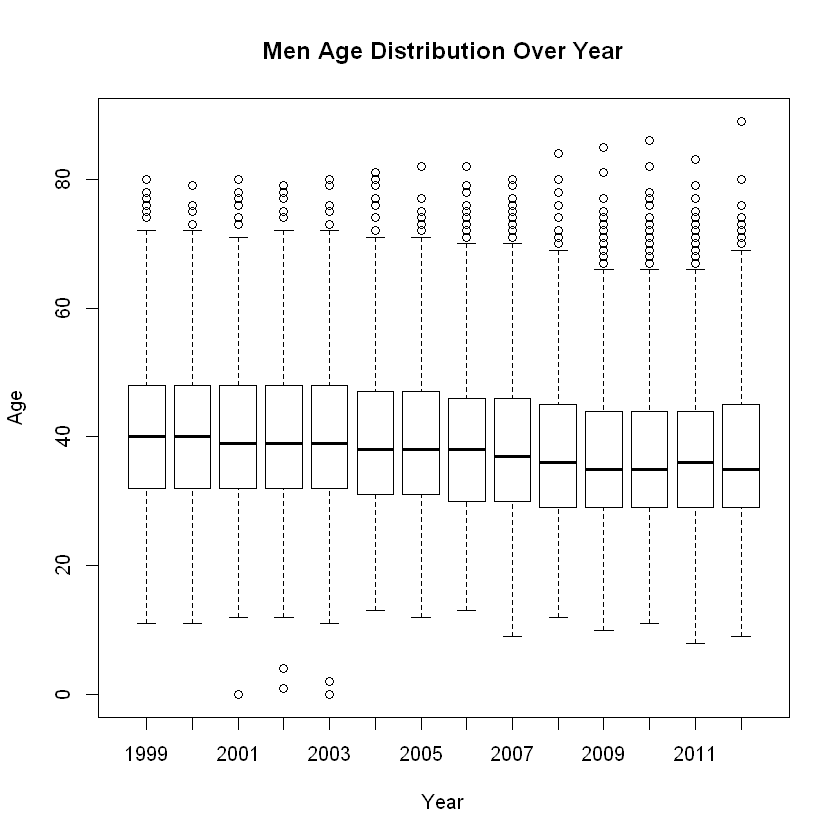

In [16]:
# Convert Age data type from string to numeric
age = sapply(menResMat,
             function(x) as.numeric(x[ , 'ag']))
boxplot(age, ylab = "Age", xlab = "Year", main='Men Age Distribution Over Year')

## Outliers w/ age lower than 5 years<a name="outlier"></a>


These values are consistent w/ website data so these are the data source issues. 

[Back to top](#Top)

In [13]:
menResMat$'2001'[which(age$'2001' < 5),]

menResMat$'2002'[which(age$'2002' < 5),]

menResMat$'2003'[which(age$'2003' < 5),]

name,home,ag,gun,net,time
Steve PINKOS,Washington DC,0,1:22:34,1:20:07,NA
Jeff LAKE,Clarksville MD,0,1:41:22,1:39:26,NA
Greg RHODE,Washington DC,0,1:42:13,1:37:14,NA


name,home,ag,gun,net,time
Arlon WILBER,Durham NC,4,1:30:22,1:28:56,NA
Nicholas RUGH,Arlington VA,1,1:46:20,1:43:45,NA


name,home,ag,gun,net,time
John Riedel,Annapolis MD,2,1:20:55,1:19:21,NA
Robert Anderson,Washington DC,0,1:31:54,1:28:48,NA


# Convert Time Format<a name="createDF"></a> <a name="convertTime"></a>

In [14]:
# Function convert time hr:mn:00 to minutes
convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}

In [15]:
createDF = function(Res, year, sex) 
{
  # Determine which time to use
  if ( !is.na(Res[1, 'net']) ) useTime = Res[ , 'net']
  else if ( !is.na(Res[1, 'time']) ) useTime = Res[ , 'time']
  else useTime = Res[ , 'gun']
  
  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'], home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [17]:
# make a list w/ all year data
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)
# count NA values
sapply(menDF, function(x) sum(is.na(x$runTime)))

Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0

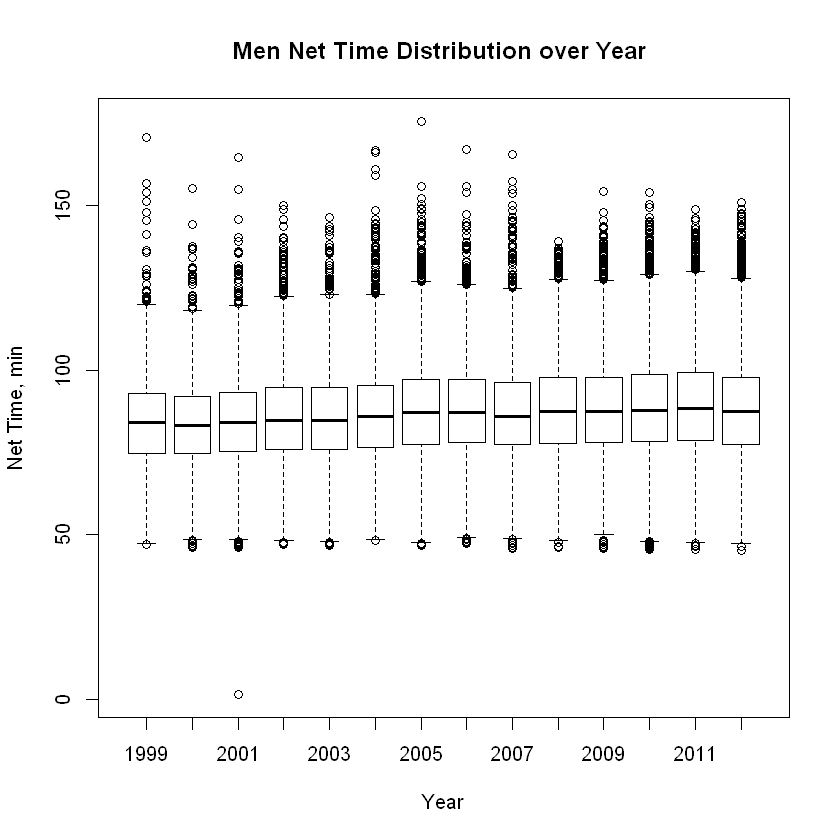

In [18]:
boxplot(sapply(menDF, function(x) x$runTime), 
        xlab = "Year", ylab = "Net Time, min", main = 'Men Net Time Distribution over Year ')

## Men combined list w/ all year data<a name="lengthM"></a>

[Back to top](#Results)

In [20]:
cbMen = do.call(rbind, menDF)
dim(cbMen)

summary(cbMen)

[1] 70070     6

      year          sex                name               home          
 Min.   :1999   Length:70070       Length:70070       Length:70070      
 1st Qu.:2004   Class :character   Class :character   Class :character  
 Median :2007   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2007                                                           
 3rd Qu.:2010                                                           
 Max.   :2012                                                           
                                                                        
      age           runTime      
 Min.   : 0.00   Min.   :  1.50  
 1st Qu.:30.00   1st Qu.: 77.23  
 Median :37.00   Median : 86.53  
 Mean   :38.61   Mean   : 87.48  
 3rd Qu.:46.00   3rd Qu.: 96.60  
 Max.   :89.00   Max.   :175.60  
 NA's   :23                      

In [21]:
cbMenFilt = cbMen[!is.na(cbMen$age) & cbMen$runTime> 5,]
summary(cbMenFilt)

      year          sex                name               home          
 Min.   :1999   Length:70046       Length:70046       Length:70046      
 1st Qu.:2004   Class :character   Class :character   Class :character  
 Median :2007   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2007                                                           
 3rd Qu.:2010                                                           
 Max.   :2012                                                           
      age           runTime      
 Min.   : 0.00   Min.   : 45.25  
 1st Qu.:30.00   1st Qu.: 77.23  
 Median :37.00   Median : 86.53  
 Mean   :38.61   Mean   : 87.48  
 3rd Qu.:46.00   3rd Qu.: 96.60  
 Max.   :89.00   Max.   :175.60  

## Function to clean Name value<a name="trimBlanks"></a>

In [23]:
trimBlanks = function(charVector) {
  nameClean = gsub("^[[:blank:]]+", "", charVector) # Remove space before str
  nameClean = gsub("[[:blank:]]+$", "", nameClean)  # Remove space after str
  nameClean = gsub("[[:blank:]]+", " ", nameClean)  # Allow 1 space only
  nameClean = gsub("[,.]", "", nameClean)           # Remove comma and dot
  nameClean = tolower(nameClean)                    # Change to lower case
}

nameClean = trimBlanks(cbMenFilt$name)
# create a new feature, 'cleanName'
cbMenFilt$'cleanName' = nameClean

# <span style="color:red">Women Result Data Downloading and Cleaning


In [24]:
ubase = "http://www.cherryblossom.org/"

womenURLs =  c("results/1999/cb99f.html", "results/2000/Cb003f.htm", "results/2001/oof_f.html",
    "results/2002/ooff.htm", "results/2003/CB03-F.HTM",
    "results/2004/women.htm", "results/2005/CB05-F.htm", 
    "results/2006/women.htm", "results/2007/women.htm", 
    "results/2008/women.htm", "results/2009/09cucb-F.htm",
    "results/2010/2010cucb10m-f.htm", 
    "results/2011/2011cucb10m-f.htm",
    "results/2012/2012cucb10m-f.htm")

urls = paste(ubase, womenURLs, sep = "")

In [25]:
years = 1999:2012
womenTables = mapply(extractResTable, url = urls, year = years, sex = 'female')
names(womenTables) = years
sapply(womenTables, length)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2359 2169 2976 3338 3547 3907 4342 5445 5699 6405 8333 8863 9038 9738

# Write downloaded files into text files

<span style="color:blue">code to write into text files are reduced

In [26]:
xList = paste0('womenTables[["', 1999:2012,'"]]')

fileList = paste0('WomenTxt/', 1999:2012,'.txt')

dir.create(file.path(getwd(), "WomenTxt"))
for (i in 1:14){
    write(x = eval(parse(text = xList[i])), file = fileList[i])
}

Warning message in dir.create(file.path(getwd(), "WomenTxt")):
"'C:\Users\ML\Documents\QTWcode\unit8\WomenTxt' already exists"

In [27]:
# Read women files
ffilenames = paste("WomenTxt/", 1999:2012, ".txt", sep = "")
womenFiles = lapply(ffilenames, readLines)
names(womenFiles) = 1999:2012

## <span style="color:blue">Function to find separation points using one of the recording not '===' line<a name="FindCol2"></a>

In [33]:
# Function to find column locations II
findColLocs2 = function(spacerRow) {
    spaceLocs = gregexpr(" ", spacerRow)[[1]]
    spaceLocsDiff = diff(spaceLocs)
    spaceLocsFilt = spaceLocs[spaceLocsDiff>1]
    spaceLocs = spaceLocsFilt[-c(1, 4, 7)]
    
    rowLength = nchar(spacerRow)
    if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
    else return(c(0, spaceLocs))
}

## <span style="color:blue">Function to extract value w/ handling exceptions from year 2001 <a name="Extract"></a>

In [30]:
# Function to extract values from text file
extractVariablesWomen = 
  function(file, year, varNames =c("name", "home", "ag", "gun", "net", "time"))
{
      # Find the index of the row with =s
    if (year == 2001){
        eqIndex = grep("Elana", file)-1
        headerRow = 'place  num   name                  ag hometown           gun tim  net tim ' # 
        spacerRow = file[length(file)-10]
        searchLocs = findColLocs2(spacerRow)
    } else{
        eqIndex = grep("^===", file)
        headerRow = tolower(file[ eqIndex - 1 ])
        spacerRow = file[eqIndex] 
        searchLocs = findColLocs(spacerRow)
    }
       # Extract the two key rows and the data
    body = file[ -(1 : eqIndex) ]


        # Remove footnotes and blank rows
    footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
    if ( length(footnotes) > 0 ) body = body[ -footnotes ]
      blanks = grep("^[[:blank:]]*$", body)
    if (length(blanks) > 0 ) body = body[ -blanks ]

        # Obtain the starting and ending positions of variables

    locCols = selectCols(varNames, headerRow, searchLocs)

    Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
    colnames(Values) = varNames

    invisible(Values)
}

## Code to fix a separator (*===*) on 2006 text file

In [31]:
# Fixing Separator issue with Men-2006'file 
separatorIdx = grep("^===", womenFiles[["2006"]])
separatorRow = womenFiles[['2006']][separatorIdx]
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
womenFiles[['2006']][separatorIdx] = separatorRowX

In [34]:
# Women result list by adding all file recordings
womenResMat = mapply(extractVariablesWomen, womenFiles, 1999:2012)
cat('Length of result list:\n',
length(womenResMat))
cat('\n\nLength of each year recordings:\n')
sapply(womenResMat, nrow)

Length of result list:
 14

Length of each year recordings:


1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2356 2166 2972 3334 3542 3899 4333 5435 5690 6397 8323 8853 9030 9730

## make a list w/ all year data

In [35]:
womenDF = mapply(createDF, womenResMat, year = 1999:2012,
               sex = rep("F", 14), SIMPLIFY = FALSE)
# Count NA values in time
sapply(womenDF, function(x) sum(is.na(x$runTime)))

Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0

## <span style="color:blue">Box plot showing the data distribution without any data reading issues

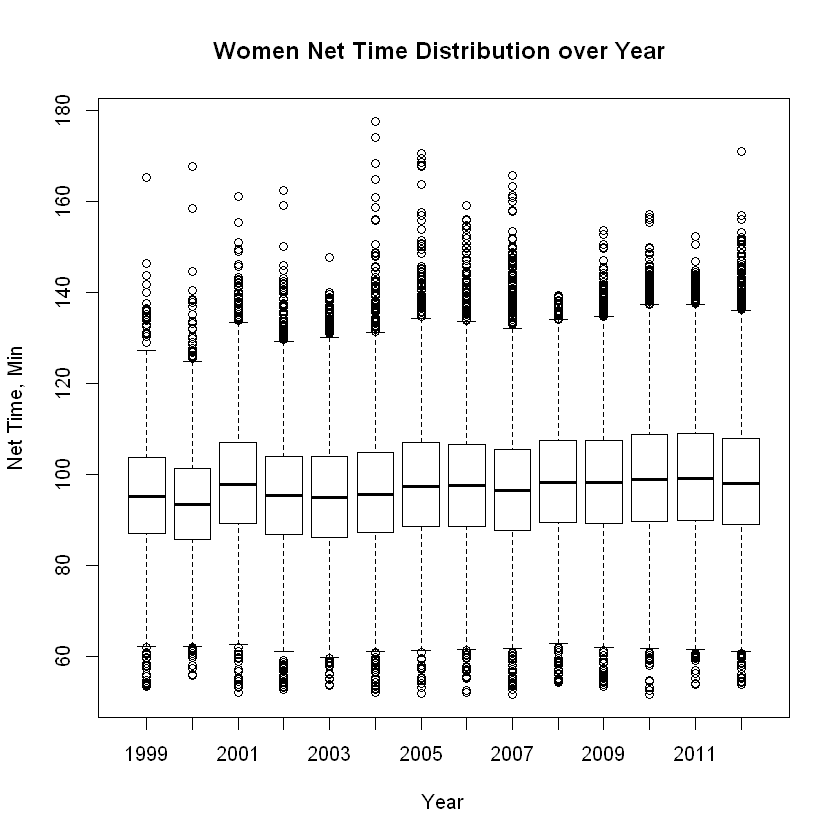

In [37]:
boxplot(sapply(womenDF, function(x) x$runTime), 
        xlab = "Year", ylab = "Net Time, Min", main = 'Women Net Time Distribution over Year ')

## <span style="color:blue">Appending all women results

In [38]:
cbWomen = do.call(rbind, womenDF)
dim(cbWomen)

[1] 75972     6

## <span style="color:blue"> Summary of Women's results

In [39]:
## <span style="color:blue">Women result with Dropping NA values in age
summary(cbWomen)

      year          sex                name               home          
 Min.   :1999   Length:75972       Length:75972       Length:75972      
 1st Qu.:2005   Class :character   Class :character   Class :character  
 Median :2008   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2007                                                           
 3rd Qu.:2010                                                           
 Max.   :2012                                                           
                                                                        
      age           runTime      
 Min.   : 0.00   Min.   : 51.73  
 1st Qu.:27.00   1st Qu.: 88.67  
 Median :32.00   Median : 97.50  
 Mean   :33.85   Mean   : 98.23  
 3rd Qu.:39.00   3rd Qu.:106.97  
 Max.   :87.00   Max.   :177.52  
 NA's   :21                      

## <span style="color:blue">Women result with Dropping NA values in age <a name="length"></a>
    
[Back to top](#Results)

In [41]:
cbWomenFilt = cbWomen[!is.na(cbWomen$age),]
summary(cbWomenFilt)

      year          sex                name               home          
 Min.   :1999   Length:75951       Length:75951       Length:75951      
 1st Qu.:2005   Class :character   Class :character   Class :character  
 Median :2008   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2007                                                           
 3rd Qu.:2010                                                           
 Max.   :2012                                                           
      age           runTime      
 Min.   : 0.00   Min.   : 51.73  
 1st Qu.:27.00   1st Qu.: 88.67  
 Median :32.00   Median : 97.50  
 Mean   :33.85   Mean   : 98.23  
 3rd Qu.:39.00   3rd Qu.:106.97  
 Max.   :87.00   Max.   :177.52  

## Two values with age of 0 and 7 look suspicious

In [42]:
cbWomenFilt[cbWomenFilt$age <12,]

,year,sex,name,home,age,runTime
2001.1878,2001,F,Rachael POWERS,Quantico VA,11,102.20000
2001.2611,2001,F,Loretta CUCE,Alexandria VA,0,114.65000
2005.1233,2005,F,Jennifer Shore,Bethesda MD,10,93.91667
2007.2971,2007,F,Hannah Hancock,Fayetteville GA,10,97.46667
2008.6210,2008,F,Kailey Helfenberger,Lexington KY,11,125.43333
2009.6624,2009,F,Sydney Garrett,Newport News VA,7,109.86667
2009.7023,2009,F,Anna Jones,Guntersville AL,11,112.70000
2010.1725,2010,F,Saffron Winton-Lavieri,Pennington NJ,11,87.43333
2010.8714,2010,F,Madison Swearingen,Haymarket VA,11,133.88333
2011.5597,2011,F,Nicole Shelton,Dover PA,11,103.38333


##  Add cleaned Name feature
    
This deletes all spaces except the separation between names.  And the names will be turned into lower cases.

In [43]:
# clean name
nameClean = trimBlanks(cbWomenFilt$name)
cbWomenFilt$'cleanName' = nameClean

# <span style="color:red">Append Women and Men Results

In [44]:
Results = rbind(cbMenFilt, cbWomenFilt)
cat('Dimension of the Women and Men combined table:\n', dim(Results))

Dimension of the Women and Men combined table:
 145997 7

## Age distribution by Sex<a name="age"></a>

[Back to top](#Results)

sex,age.mean
F,33.8487709180919
M,38.6065442709077
Difference,4.76


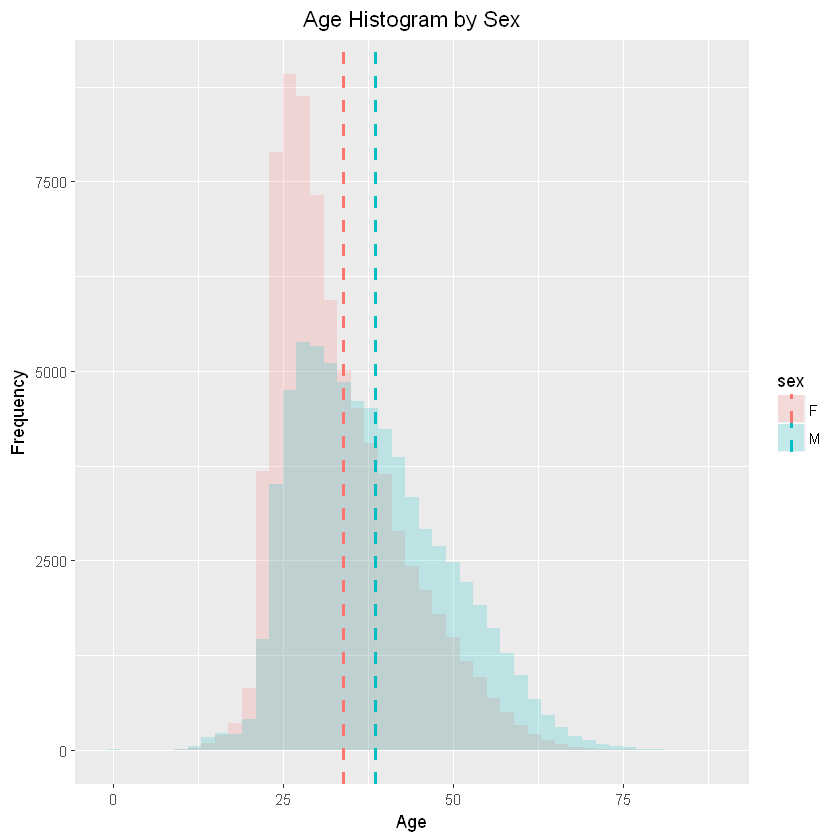

In [56]:
# # Density plots with semi-transparent fill
library(ggplot2)

# Find the mean of each group
library(plyr)
meanAge <- ddply(Results, "sex", summarise, age.mean=mean(age))
meanAge2 <- rbind(meanAge, c('Difference',round(diff(unlist(meanAge[2])),2)))
meanAge2

# Density plots with means
ggplot(Results, aes(x=age, fill=sex)) +
    geom_histogram(alpha=.2, binwidth = 2, position = 'identity')+
    geom_vline(data=meanAge, aes(xintercept= age.mean,  colour=sex),
               linetype="dashed", size=1) +
    xlab("Age") +
    ylab("Frequency") +
    ggtitle("Age Histogram by Sex")+
    theme(plot.title = element_text(hjust = 0.5))

## Net Time Distribution by Sex<a name="time"></a>

[Back to top](#Results)

sex,runTime.mean
F,98.2323925952259
M,87.4790390124585
Difference,-10.75


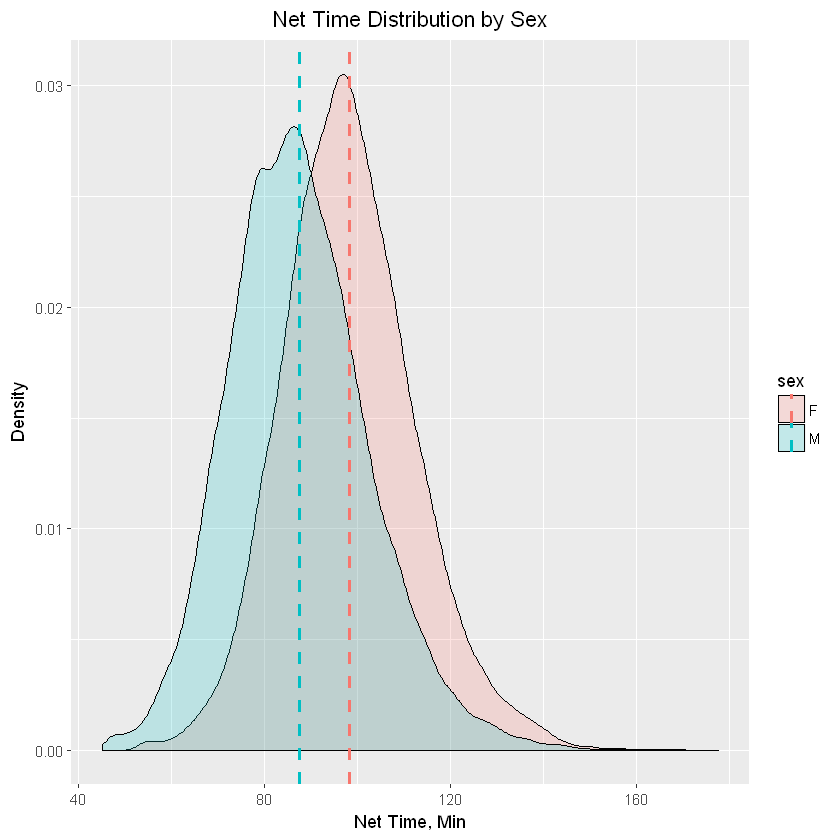

In [55]:
# A basic box with the conditions colored
meanTime <- ddply(Results, "sex", summarise, runTime.mean=mean(runTime))
meanTime2 <- rbind(meanTime, c('Difference',round(diff(unlist(meanTime[2])),2)))
meanTime2
# ggplot(Results, aes(x=sex, y=runTime, fill=sex)) + geom_boxplot()

# Density plots with means
ggplot(Results, aes(x=runTime, fill=sex)) +
    geom_density(alpha=.2) +
    geom_vline(data=meanTime, aes(xintercept= runTime.mean,  colour=sex),
               linetype="dashed", size=1)+
    xlab("Net Time, Min") +
    ylab("Density") +
    ggtitle("Net Time Distribution by Sex")+
    theme(plot.title = element_text(hjust = 0.5))


## Number of Runners vs Year<a name="participants"></a>

[Back to top](#Results)

In [52]:
runnerCount = with(Results, table(year, sex))
runnerCount

      sex
year      F    M
  1999 2352 3189
  2000 2166 3016
  2001 2972 3560
  2002 3330 3721
  2003 3542 3946
  2004 3899 4156
  2005 4325 4314
  2006 5434 5235
  2007 5600 5249
  2008 6397 5905
  2009 8321 6647
  2010 8853 6905
  2011 9030 7011
  2012 9730 7192

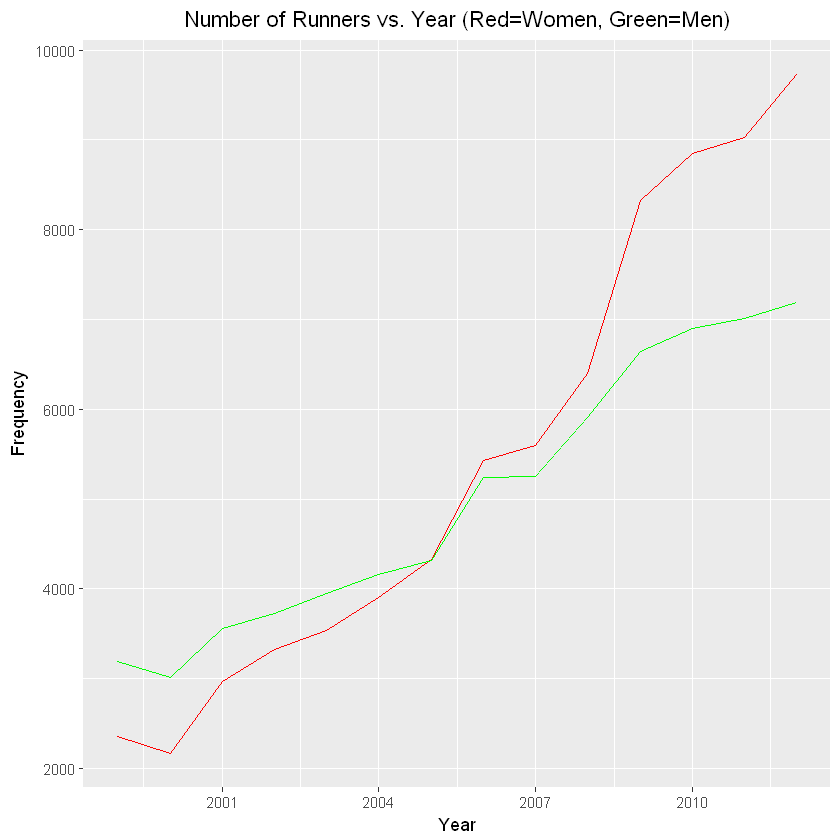

In [62]:
df <- data.frame('Year'= 1999:2012, 'FemaleCnt' = runnerCount[,'F'],'MaleCnt' = runnerCount[,'M'])
gg <-ggplot(df, aes(Year)) +                    # basic graphical object
    geom_line(aes(y=FemaleCnt), colour="red") +  # first layer
    geom_line(aes(y=MaleCnt), colour="green") +  # second layer
    xlab("Year") +
    ylab("Frequency") +
    ggtitle("Number of Runners vs. Year (Red=Women, Green=Men)")+
    theme(plot.title = element_text(hjust = 0.5))

gg + scale_shape_discrete(labels=c('Women','Men'))

## Net Time vs. Age

The lowest time area is not overlapping.

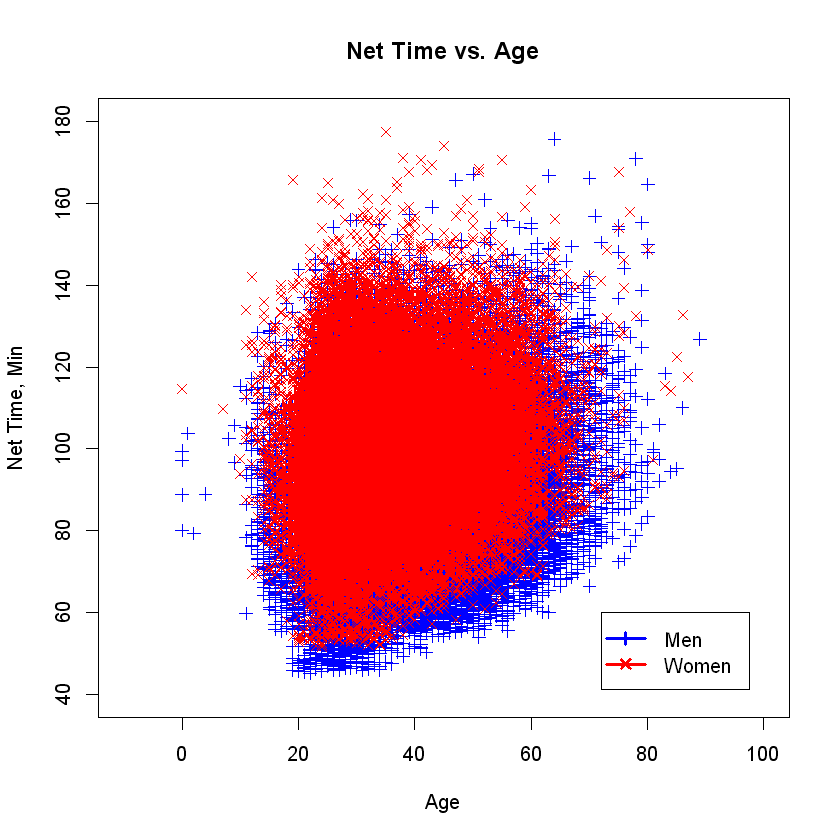

In [67]:
plot(runTime ~ age, data = cbMenFilt, ylim = c(40, 180), xlim = c(-10,100),
    xlab = "Age", ylab = "Net Time, Min", main = 'Net Time vs. Age',
    col = 'Blue', pch = 3)
par(new='True')
plot(runTime ~ age, data = cbWomenFilt, ylim = c(40, 180),  xlim = c(-10,100),
     xlab = "Age", ylab = "Net Time, Min", main = 'Net Time vs. Age',
    col = 'Red', pch = 4)
legend(72,60, c('Men','Women'), pch=c(3,4), lwd=c(2.5,2.5),col=c('blue','red'))

## Selecting top 1% of men runners

In [70]:
menTop1percent = tapply(cbMenFilt$runTime, cbMenFilt$age, function(x) x[order(x)][c(1:round(length(x)*.01))])
menTop1percent

$`0`
[1] 80.11667

$`1`
[1] 103.75

$`2`
[1] 79.35

$`4`
[1] 88.93333

$`8`
[1] 102.5

$`9`
[1] 96.6

$`10`
[1] 115.2833

$`11`
[1] 59.83333

$`12`
[1] 76.13333

$`13`
[1] 71.26667

$`14`
[1] 64.31667

$`15`
[1] 60.8

$`16`
[1] 55.91667

$`17`
[1] 55.5

$`18`
[1] 56.16667

$`19`
[1] 45.96667

$`20`
[1] 45.73333 45.83333

$`21`
[1] 45.60000 45.68333

$`22`
[1] 45.25000 46.20000 46.36667 46.50000 46.95000

$`23`
 [1] 46.13333 46.25000 46.43333 46.46667 47.53333 47.60000 47.63333 47.63333
 [9] 48.28333 48.70000

$`24`
 [1] 45.71667 46.31667 46.46667 47.01667 47.11667 47.58333 47.66667 48.01667
 [9] 48.70000 49.43333 49.53333 49.63333 49.63333 49.63333 49.65000 49.73333

$`25`
 [1] 47.00000 47.08333 47.31667 47.38333 47.55000 47.70000 47.75000 47.88333
 [9] 47.90000 47.90000 48.18333 48.20000 48.20000 48.21667 48.28333 48.43333
[17] 48.56667 48.61667 48.65000

$`26`
 [1] 46.00000 46.10000 46.10000 46.20000 46.23333 46.33333 46.40000 46.86667
 [9] 46.93333 47.26667 47.28333 47.31667 47.51667 47.51667 47.61667 48.36667
[17] 49.35000 49.68333 49.96667 50.30000 51.00000 51.21667 51.76667

$`27`
 [1] 45.93333 46.06667 46.13333 46.18333 46.91667 47.05000 47.05000 47.20000
 [9] 47.33333 47.40000 47.56667 47.83333 47.95000 48.05000 48.16667 48.31667
[17] 48.43333 48.70000 49.06667 49.30000 49.33333 49.36667 49.66667 49.71667
[25] 49.93333

$`28`
 [1] 46.36667 46.56667 46.85000 46.88333 46.98333 47.03333 47.11667 47.16667
 [9] 47.65000 47.80000 47.91667 47.96667 48.05000 48.20000 49.23333 49.43333
[17] 49.68333 49.73333 49.80000 50.10000 50.38333 50.56667 50.58333 50.63333
[25] 51.16667 51.25000 51.28333

$`29`
 [1] 46.45000 46.90000 46.90000 47.50000 47.56667 47.83333 47.96667 47.98333
 [9] 48.05000 48.10000 48.58333 48.58333 48.63333 48.70000 49.43333 49.43333
[17] 49.45000 49.55000 50.33333 50.63333 50.70000 50.93333 51.11667 51.23333
[25] 51.26667 51.45000 51.48333

$`30`
 [1] 46.76667 48.00000 48.05000 48.88333 48.90000 49.16667 49.38333 50.06667
 [9] 50.43333 50.46667 50.56667 50.86667 51.18333 51.48333 51.88333 52.00000
[17] 52.31667 52.78333 53.06667 53.43333 53.60000 53.91667 53.96667 54.00000
[25] 54.31667 54.33333 54.50000

$`31`
 [1] 45.98333 46.63333 46.65000 47.55000 47.83333 47.86667 48.06667 48.18333
 [9] 48.83333 49.75000 49.96667 50.41667 50.46667 50.46667 50.66667 50.73333
[17] 50.98333 51.28333 52.40000 52.53333 53.28333 53.40000 53.45000 53.80000
[25] 53.83333 54.35000

$`32`
 [1] 46.18333 46.31667 46.50000 46.96667 47.30000 47.93333 48.01667 48.08333
 [9] 49.11667 49.73333 49.95000 50.45000 50.61667 50.93333 50.95000 50.98333
[17] 51.10000 51.18333 51.83333 52.15000 52.28333 52.43333 52.50000 52.53333
[25] 52.60000 52.66667

$`33`
 [1] 47.30000 47.80000 47.93333 50.80000 50.83333 51.56667 51.60000 51.93333
 [9] 51.96667 52.78333 52.83333 52.93333 52.96667 53.23333 53.61667 53.85000
[17] 54.15000 54.21667 54.26667 54.28333 54.58333 54.60000 54.73333 54.86667
[25] 54.88333

$`34`
 [1] 46.08333 46.81667 50.00000 50.86667 51.76667 51.93333 52.13333 53.05000
 [9] 54.18333 54.21667 54.23333 54.48333 54.88333 54.90000 55.63333 55.86667
[17] 56.40000 56.53333 56.63333 56.75000 57.56667 57.60000 57.61667 57.96667

$`35`
 [1] 47.78333 47.93333 51.50000 52.36667 52.41667 52.95000 53.55000 54.45000
 [9] 54.51667 54.61667 54.86667 54.96667 55.35000 55.90000 55.93333 56.26667
[17] 56.55000 56.71667 57.33333 57.36667 57.41667 57.53333 57.63333 57.78333

$`36`
 [1] 47.55000 47.71667 50.73333 51.26667 53.35000 53.35000 54.03333 54.38333
 [9] 54.61667 55.18333 55.21667 55.68333 55.90000 55.93333 55.98333 56.31667
[17] 56.38333 56.48333 56.68333 56.73333 57.25000 57.35000 57.35000

$`37`
 [1] 50.26667 52.16667 52.45000 52.63333 52.78333 53.73333 53.80000 54.31667
 [9] 54.41667 55.66667 55.91667 56.40000 56.68333 56.83333 57.33333 57.40000
[17] 57.58333 58.01667 58.16667 58.25000 58.28333 58.30000 58.35000

$`38`
 [1] 49.36667 52.48333 54.23333 55.35000 55.78333 55.78333 55.93333 55.98333
 [9] 56.18333 56.61667 56.66667 57.00000 57.41667

## Fastest Record per Year

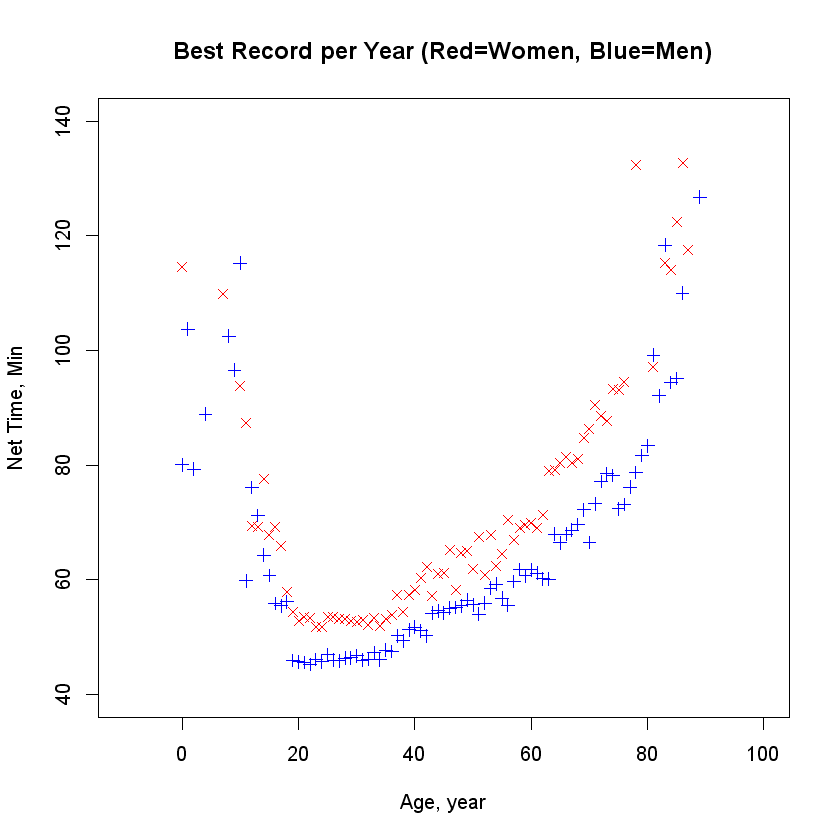

In [72]:
# fastest Man result per year
fastestMan = tapply(cbMenFilt$runTime, cbMenFilt$age, min, na.rm = TRUE)
fastestMan = as.matrix(sapply(fastestMan, as.numeric))
DF_fastestMan = data.frame('Age' = as.numeric(rownames(fastestMan)), 'RecordTime' = fastestMan[,1])

# fastest Woman result per year
fastestWoman = tapply(cbWomenFilt$runTime, cbWomenFilt$age, min, na.rm = TRUE)
fastestWoman = as.matrix(sapply(fastestWoman, as.numeric))
DF_fastestWoman = data.frame('Age' = as.numeric(rownames(fastestWoman)), 'RecordTime' = fastestWoman[,1])

plot(DF_fastestMan, col='blue', ylim = c(40, 140), xlim = c(-10,100),
     xlab = "Age, year", ylab = "Net Time, Min", pch = 3, main='Best Record per Year (Red=Women, Blue=Men)')
par(new='True')
plot(DF_fastestWoman, col='red', ylim = c(40, 140), xlim = c(-10,100),
     xlab = "Age, year", ylab = "Net Time, Min", pch = 4, main='Best Record per Year (Red=Women, Blue=Men)')

## Change Point search<a name="change"></a>

Change point in variance is used to check the change points in the difference in time over years. 

Years showing variance change in difference w/PELT method:


[1] 15 50 76


Years showing variance change in difference w/BinSeg method:


[1]  8 15 50 76

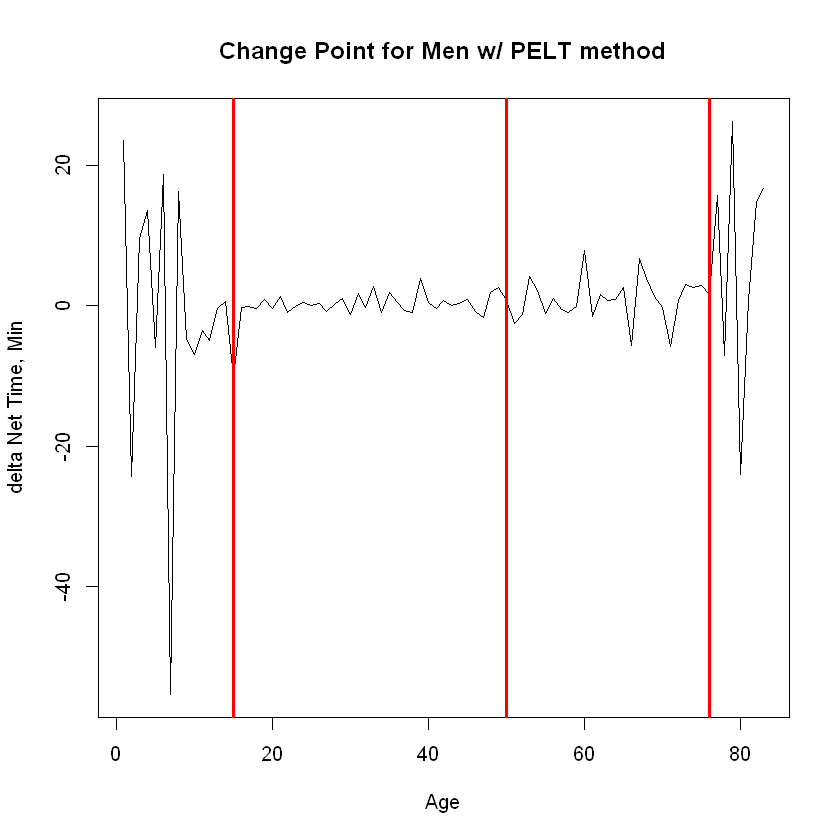

In [75]:
library(changepoint)
fastestMan.pelt <- cpt.var(diff(DF_fastestMan$RecordTime), method = 'PELT', penalty='MBIC')
plot(fastestMan.pelt, cpt.width = 3, xlab = "Age", ylab = "delta Net Time, Min", 
     main='Change Point for Men w/ PELT method')
cat('Years showing variance change in difference w/PELT method:\n')
cpts.ts(fastestMan.pelt)
cat('\nYears showing variance change in difference w/BinSeg method:\n')
fastestMan.binseg <- cpt.var(diff(DF_fastestMan$RecordTime), method = 'BinSeg', penalty='MBIC')
cpts.ts(fastestMan.binseg)

Years showing variance change in difference w/PELT method:


[1] 11 28 68

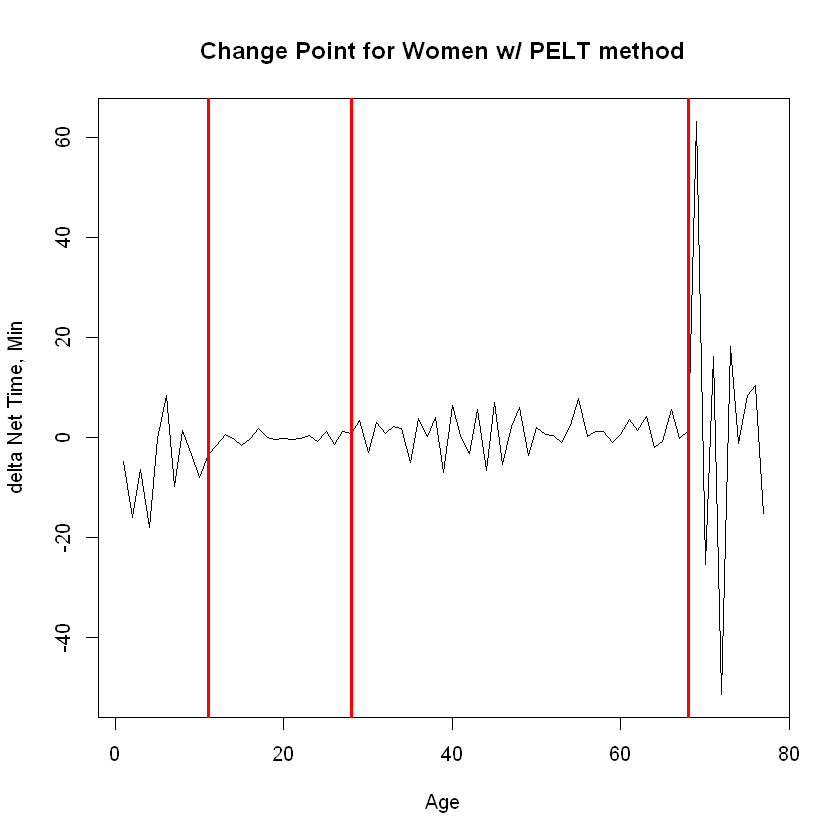

In [76]:
fastestWoman.pelt <- cpt.var(diff(DF_fastestWoman$RecordTime), method = 'PELT', penalty='MBIC')
plot(fastestWoman.pelt, cpt.width = 3, xlab = "Age", ylab = "delta Net Time, Min", 
     main='Change Point for Women w/ PELT method')
cat('Years showing variance change in difference w/PELT method:\n')
cpts.ts(fastestWoman.pelt)

## Subset years with stable Net Time change


In [84]:
minAge = 15
maxAge = 68

DF_fastestMan = DF_fastestMan[DF_fastestMan$Age >minAge & DF_fastestMan$Age <maxAge,]
DF_fastestWoman = DF_fastestWoman[DF_fastestWoman$Age >minAge & DF_fastestWoman$Age <maxAge,]

## <span style="color:blue">LOWESS model for the fastest women and men <a name="Lowess"></a>
    
[Back to top](#Results)

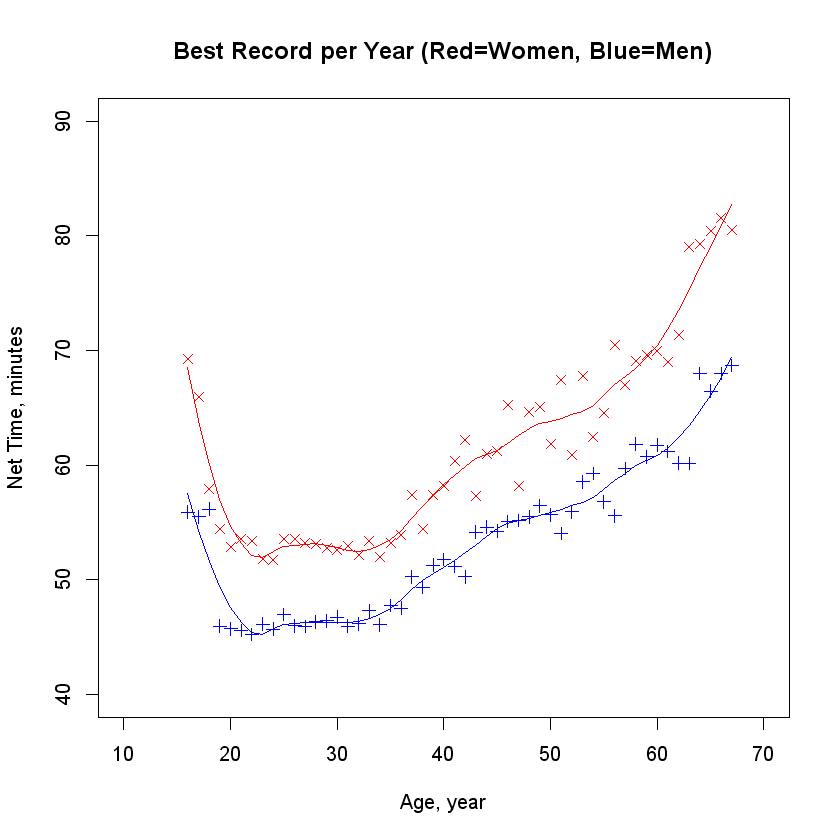

In [85]:
# Model for the fastest men
loessMod = loess(RecordTime ~ Age, data = DF_fastestMan, span = 0.3)
predictM = predict(loessMod)

# Model for the fastest women
loessMod = loess(RecordTime ~ Age, data = DF_fastestWoman, span = 0.3)
predictF = predict(loessMod)

# Plot
plot(DF_fastestMan, col='blue', ylim = c(40, 90), xlim = c(10,70),
     xlab = "Age, year", ylab = "Net Time, minutes", pch = 3,
     main='Best Record per Year (Red=Women, Blue=Men)')
lines(predictM, x=DF_fastestMan$Age, col="blue")
par(new='True')
plot(DF_fastestWoman, col='red', ylim = c(40, 90), xlim = c(10,70),
     xlab = "Age, year", ylab = "Net Time, minutes",pch = 4,
     main='Best Record per Year (Red=Women, Blue=Men)')
lines(predictF, x=DF_fastestWoman$Age, col="red")


# Difference between models with best records

Change Point in Mean:


[1] 17 47 61

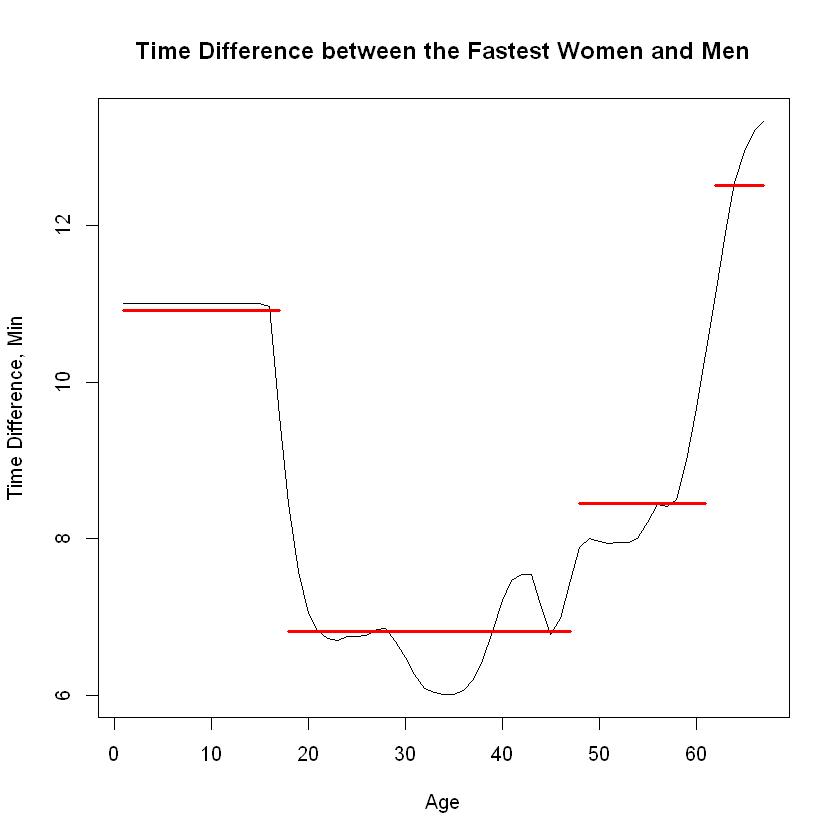

In [87]:
# plot(x = DF_fastestWoman$Age, y = predictF-predictM, col = "purple", lwd = 2, type='l')
diffFM = c(rep(11,15),predictF-predictM)

diffFM.pelt <- cpt.mean(diffFM, method = 'PELT', penalty='MBIC')
plot(diffFM.pelt, cpt.width = 3, 
     main="Time Difference between the Fastest Women and Men", xlab="Age", ylab="Time Difference, Min")
# axis(1)
# axis(1, at = diffFM$Age, labels = diffFM$Age)

cat('Change Point in Mean:\n')
cpts.ts(diffFM.pelt)

## <span style="color:blue"> Cherry Blossom Women/Men Time Ratio vs. Boston Qualification<a name="TimeRatio"></a>

<span style="color:blue; font-size: 1.3em;">The net time ratio was about 1.14 from age of 20 to 60 based on the actual 10-mile run results.  The time ratio of the [Boston qualification times](http://www.baa.org/Races/Boston-Marathon/Participant-Information/Qualifying.aspx) for women and men is decreasing as age increases since the Boston qualification time add a fixed 30-minute of extra time to women regardless of their age.  This is not a fair rule since the actual finish time ratio is about fixed between age from 20 to 60.  

[Back to top](#Results)

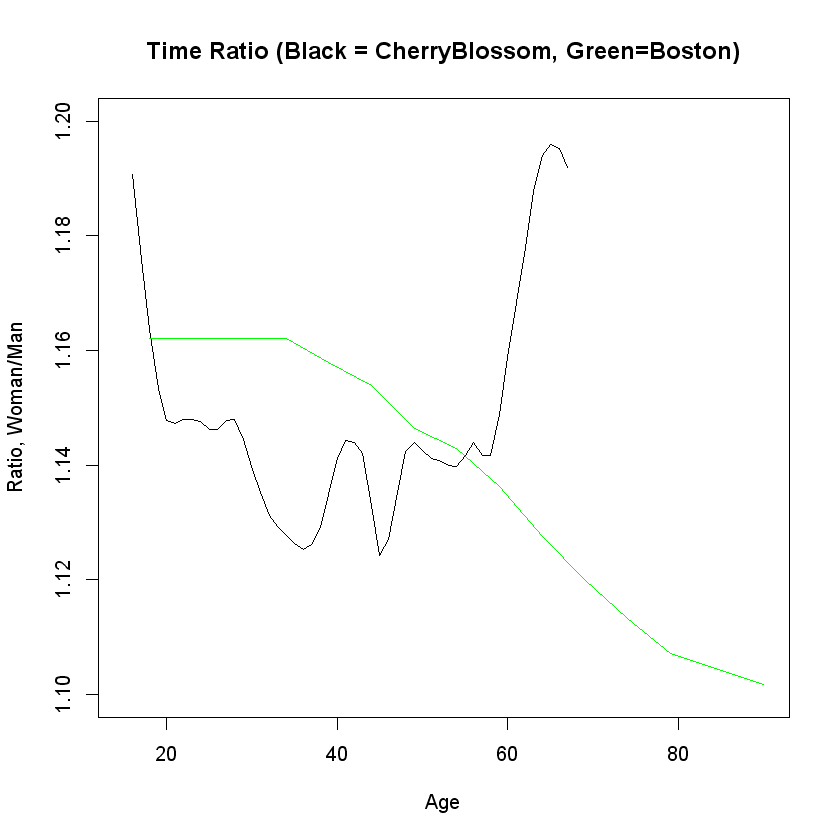

In [100]:
ratioWM =predictF/predictM
plot(16:67,ratioWM, type='l',
     ylim = c(1.1, 1.2), xlim = c(15,90), 
     main="Time Ratio (Black = CherryBlossom, Green=Boston)", xlab="Age", ylab="Ratio, Woman/Man")
par(new='True')
plot(c(18,34,39,44,49,54,59,64,69,74,79,90), 
     c(1.162162162,
        1.162162162,
        1.157894737,
        1.153846154,
        1.146341463,
        1.142857143,
        1.136363636,
        1.127659574,
        1.12,
        1.113207547,
        1.107142857,
        1.101694915),
     col='Green', ylim = c(1.1, 1.2), xlim = c(15,90), , type='l',
     main="Time Ratio (Black = CherryBlossom, Green=Boston)", xlab="Age", ylab="Ratio, Woman/Man")

